# Climate vs EV_sales

Studies have shown that high temperatures as well as cold temperatures have an impact on electric car trams. So in this NoteBook we'll be looking at whether people care enough about this to make the temperature affect car sales

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np

## Parameters 

In [2]:
EV_SALE_DATASET = '../Processed_Data/Ev_sales_per_capita.csv'
CLIMATE_DATASET = '../Processed_Data/climate_state.csv'

# Load Datasets
## Load the EV sales dataset

In [3]:
df_EV = pd.read_csv(EV_SALE_DATASET).set_index("Unnamed: 0")
print(df_EV.shape)
df_EV.head()

(51, 4)


,2016,2017,2018,2019
Unnamed: 0,,,,
Alabama,0.000067,0.000077,0.000174,0.000201
Alaska,0.000126,0.000115,0.000210,0.000195
Arizona,0.000333,0.000433,0.001017,0.001074
Arkansas,0.000046,0.000063,0.000145,0.000179
California,0.001883,0.002406,0.003881,0.003667


## Load the climate dataset

In [4]:
df_Climate = pd.read_csv(CLIMATE_DATASET,index_col=[0])
print(df_Climate.shape)
df_Climate.head()

(49, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
Alabama,64.9,64.0,62.1,62.3,63.0,63.0,62.1,62.4,65.1,64.1,...,64.9,62.6,62.0,64.6,65.3,65.0,64.5,65.4,64.9,64.2
Alaska,25.4,27.0,25.0,29.9,26.2,27.8,25.1,28.1,28.4,24.0,...,24.3,27.8,30.3,30.0,31.9,29.3,30.4,32.2,27.5,26.5
Arizona,59.7,59.2,59.6,59.8,60.6,61.0,61.9,60.5,59.3,60.8,...,62.1,60.4,62.2,61.8,62.2,63.0,62.3,60.3,62.6,62.1
Arkansas,61.8,61.3,59.9,59.3,60.4,60.5,59.6,59.7,63.1,62.1,...,63.6,59.6,58.7,61.4,62.8,62.5,61.2,61.2,61.1,61.2
California,58.0,58.1,59.3,57.7,58.0,58.9,59.6,59.1,56.7,58.0,...,59.5,59.3,61.4,60.8,60.1,60.3,60.1,58.4,60.5,60.3


As the data for EV sales is only available for 2016-2019, we have chosen to use 2019 for our study as it is relatively new data

## Merge into one dataframe

In [5]:
df_climate_and_ev = pd.concat([df_Climate['2019'].rename('temp'), df_EV['2019'].rename('EV_sale')], axis = 1)
df_climate_and_ev = df_climate_and_ev.dropna()
print(df_climate_and_ev.shape)
df_climate_and_ev.head()

(49, 2)


,temp,EV_sale
Alabama,65.4,0.000201
Alaska,32.2,0.000195
Arizona,60.3,0.001074
Arkansas,61.2,0.000179
California,58.4,0.003667


We will use a scatter plot to represent their relationship from the prominent cities analysed. The cities with the highest and lowest temperature respectively

In [6]:
highest_sale = df_climate_and_ev.sort_values(by='EV_sale',ascending=False).index[0]
highest_temp = df_climate_and_ev.sort_values(by='temp',ascending=False).index[0]
lowest_temp = df_climate_and_ev.sort_values(by='temp',ascending=True).index[0]
highest_sale, highest_temp, lowest_temp

('California', 'Florida', 'Alaska')

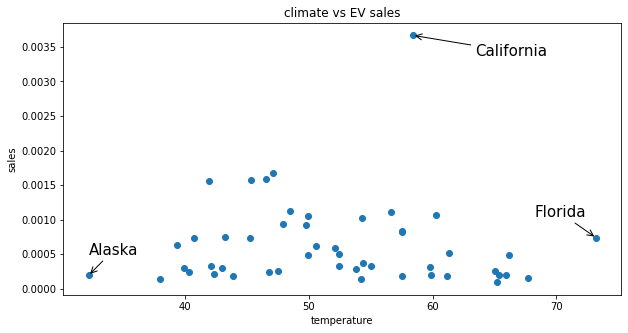

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])

plt.annotate(highest_sale, xy = (df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_sale][['temp', 'EV_sale']] +(+5, -0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_temp, xy = (df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[highest_temp][['temp', 'EV_sale']] +(-5, +0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_temp, xy = (df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']]), xytext = df_climate_and_ev.loc[lowest_temp][['temp', 'EV_sale']] +(-0, +0.0003), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

We can see the aggregation of points in the diagram and the three outliers. we remove the outlier

In [8]:
df_climate_and_ev = df_climate_and_ev.drop(highest_sale)
df_climate_and_ev = df_climate_and_ev.drop(highest_temp)
df_climate_and_ev = df_climate_and_ev.drop(lowest_temp)

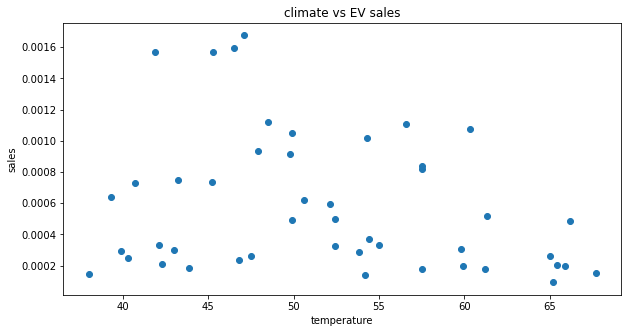

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

We now have a scatter plot of the distribution of temperature and sales, but we can't easily see its trend yet

So we decided to add linear regression models to them

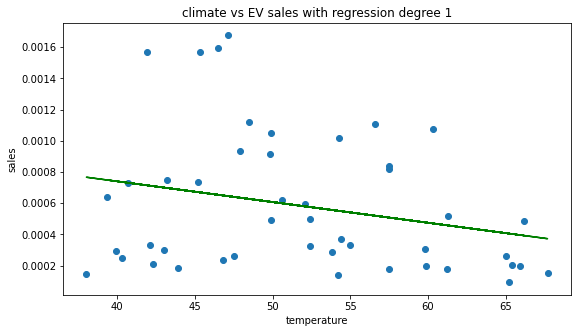

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("climate vs EV sales with regression degree 1")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'],1)
p = np.poly1d(parameter)
plt.scatter(df_climate_and_ev['temp'], df_climate_and_ev['EV_sale'])
plt.plot(df_climate_and_ev['temp'],p(df_climate_and_ev['temp']),color='g')

plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_1.png', format='png')

The results show that temperature and EV sales are inversely proportional to each other, which is not consistent with the research showing that cold temperatures can have an negative impact on EV sales.

We decided to draw a bar chart to see how they relate to each other

In [11]:
df_climate_and_ev.head()

,temp,EV_sale
Alabama,65.4,0.000201
Arizona,60.3,0.001074
Arkansas,61.2,0.000179
Colorado,45.3,0.001570
Connecticut,49.8,0.000918


In [12]:
df_climate_and_ev["temp"] = pd.to_numeric(df_climate_and_ev["temp"],errors='coerce')

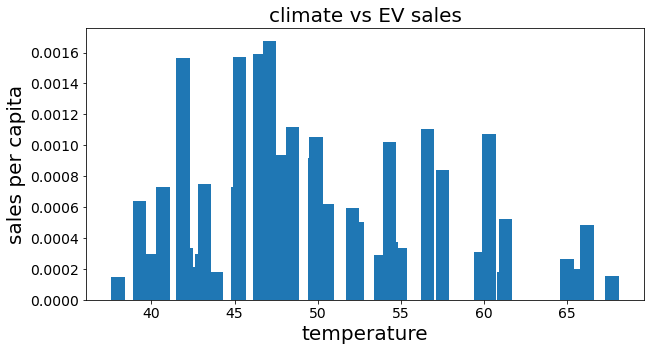

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df_climate_and_ev['temp'],df_climate_and_ev['EV_sale'])
plt.title("climate vs EV sales", fontsize=20)
plt.xlabel("temperature",fontsize=20)
plt.ylabel("sales per capita", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_2.png', format='png')

We have created a bar chart for each temperature corresponding to its sales volume, and we will make a classification of the temperatures. Each corresponds to four classes: "cold, cool, warm, hot"

In [14]:
col = ['Climate','EV_sale']
df = pd.DataFrame(columns = col)
df['Climate'] =  ['cold','cool','warm','hot']
for index, row in df.iterrows():
    if df.iloc[index,0] == 'cold':
        df.iloc[index,1] = df_climate_and_ev[(df_climate_and_ev['temp']<= 40)]['EV_sale'].sum()
    if df.iloc[index,0] == 'cool':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 40) & (df_climate_and_ev['temp']<50))]['EV_sale'].sum()
    if df.iloc[index,0] == 'warm':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 50) & (df_climate_and_ev['temp']<60))]['EV_sale'].sum()
    if df.iloc[index,0] == 'hot':
        df.iloc[index,1] = df_climate_and_ev[((df_climate_and_ev['temp']>= 60) & (df_climate_and_ev['temp']<=70))]['EV_sale'].sum()
df.head()

,Climate,EV_sale
0,cold,0.001083
1,cool,0.014907
2,warm,0.007639
3,hot,0.003166


In [15]:
df = df.set_index('Climate')

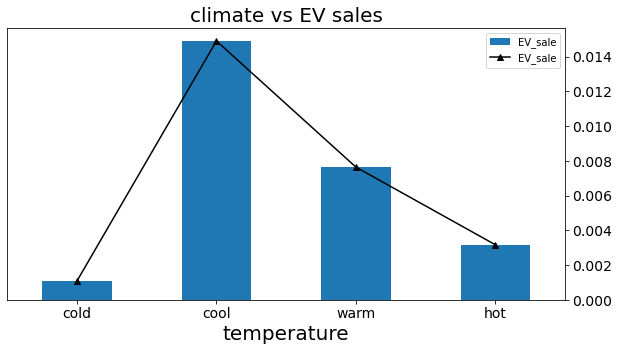

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(kind='bar',ax=ax)
df.plot(kind='line', marker='^',ax=ax, color='black')
plt.title("climate vs EV sales",fontsize=20)
plt.xlabel("temperature",fontsize=20)

ax.yaxis.tick_right()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Save as png image
fig.savefig('./Images/Climate_vs_EVsales_3.png', format='png')

So we can see that both in areas with high or too low temperatures. Not suitable for the development of new energy vehicles.